In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('all_opinions.csv')
df.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
0,Justice Roberts,majority,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...
1,Justice Thomas,concurring,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Court’s decisio...
2,Justice Breyer,dissenting,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U..."
3,Justice Taney,majority,False,Ex Parte Crenshaw,1841-02-18,40 U.S. 119,https://www.courtlistener.com/opinion/86166/ex...,https://www.courtlistener.com/api/rest/v3/clus...,1841,1841-005,2.0,9.0,0.0,This case was brought here by an appeal from t...
4,Justice Pitney,majority,False,Richards v. Washington Terminal Co.,1914-05-04,233 U.S. 546,https://www.courtlistener.com/opinion/98178/ri...,https://www.courtlistener.com/api/rest/v3/clus...,1914,1913-149,1.0,8.0,1.0,"Plaintiff in error, who was plaintiff below, c..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35781 entries, 0 to 35780
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author_name              35781 non-null  object 
 1   category                 35781 non-null  object 
 2   per_curiam               35781 non-null  bool   
 3   case_name                35781 non-null  object 
 4   date_filed               35781 non-null  object 
 5   federal_cite_one         19195 non-null  object 
 6   absolute_url             35781 non-null  object 
 7   cluster                  35781 non-null  object 
 8   year_filed               35781 non-null  int64  
 9   scdb_id                  34018 non-null  object 
 10  scdb_decision_direction  34013 non-null  float64
 11  scdb_votes_majority      34018 non-null  float64
 12  scdb_votes_minority      34018 non-null  float64
 13  text                     35781 non-null  object 
dtypes: bool(1), float64(3)

In [4]:
#Take a slice of data
#df =df[:1000]

# Exploratory Data Analysis & Preprocessing

In [5]:
#Eliminate mini opinions on majority opinions

print('\033[1m' + "Preprocessing:"+ '\033[0m')
print("1. Removal of Justice Douglas's Opinions")
print("2. Removal of mini opinions on majority Opinions")
print("3. Opinions After 1970s")

print()
print("Original df size:",df.shape)
df = df[df.text.map(lambda x: len(x) > 3000)]


#Drop justice douglas (213 opinions) for reasons detailed below
#The meta-statistics of his opinions are quite anomalous. 
#He wrote far shorter opinions, far more opinions per year, and nearly exclusively in dissent.
#The opinions he wrote were themselves highly unusua
df = df[df.author_name!= 'justice douglas']

#Only consider opinions from 1970 onwards
df = df[df.year_filed >= 1970]

print("Preprocessing df size:",df.shape)

Preprocessing:
1. Removal of Justice Douglas's Opinions
2. Removal of mini opinions on majority Opinions
3. Opinions After 1970s

Original df size: (35781, 14)
Preprocessing df size: (9409, 14)


## No. of Opinions by Author

In [6]:
df.author_name.value_counts()

Justice Stevens       966
Justice Rehnquist     697
Justice Scalia        624
Justice Brennan       609
Justice White         574
Justice Marshall      556
Justice Blackmun      551
Justice Thomas        485
Justice O'Connor      470
per_curiam            432
Justice Kennedy       420
Justice Powell        400
Justice Breyer        385
Justice Ginsburg      351
Justice Burger        344
Justice Stewart       280
Justice Souter        265
Justice Douglas       243
Justice Alito         225
Justice Sotomayor     171
Justice Kagan         110
Justice Roberts        91
Justice Black          49
Justice Gorsuch        46
Justice Harlan         38
Justice Kavanaugh      20
Justice Holmes          1
Justice Fuller          1
Justice Waite           1
Justice McReynolds      1
Justice O2122           1
Justice Woods           1
Justice Connor          1
Name: author_name, dtype: int64

## Frequency of each category of opinions

Text(0.5, 0, 'Frequency')

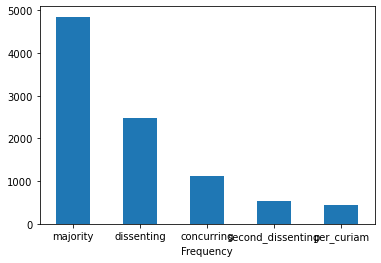

In [7]:
df.category.value_counts().plot.bar(x='lab', y='val', rot=0)
plt.xlabel('Frequency')

## Length of Opinion Text by Category

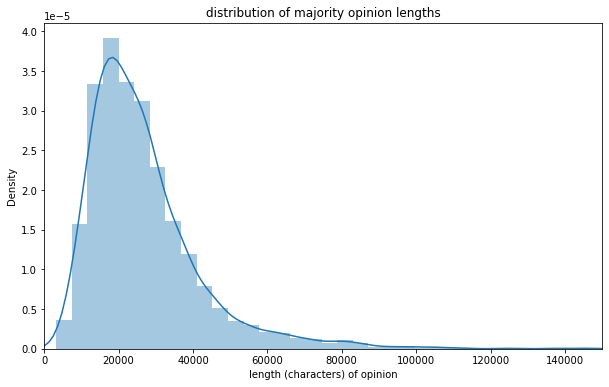

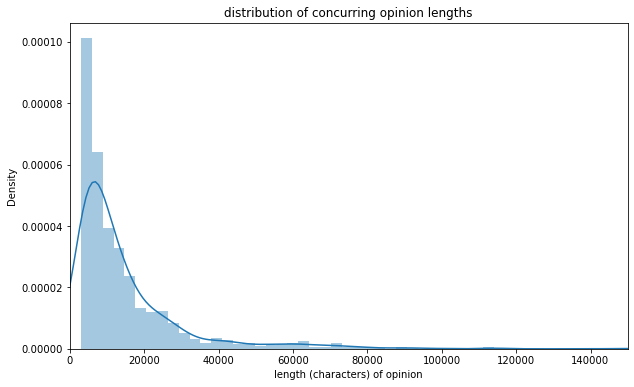

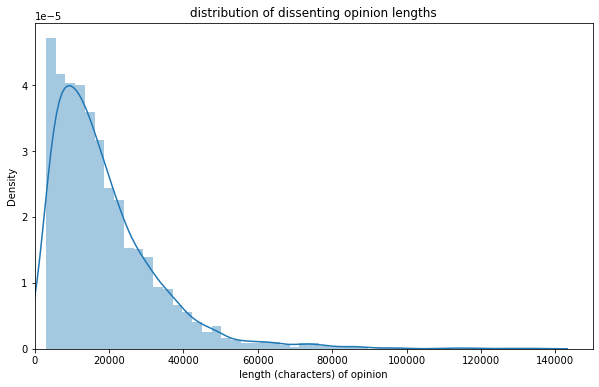

In [8]:
categories = ['majority', 'concurring', 'dissenting']

for cat in categories:
    plt.figure(figsize=(10,6))
    sns.distplot(df[df.category==cat].text.map(lambda x: len(x)))
    plt.title('distribution of ' + cat + ' opinion lengths')
    plt.xlim((0,150000))
    plt.xlabel('length (characters) of opinion')
    plt.show()

## No. of Opinions Per Category Contributed by Different Justice (Yearly)

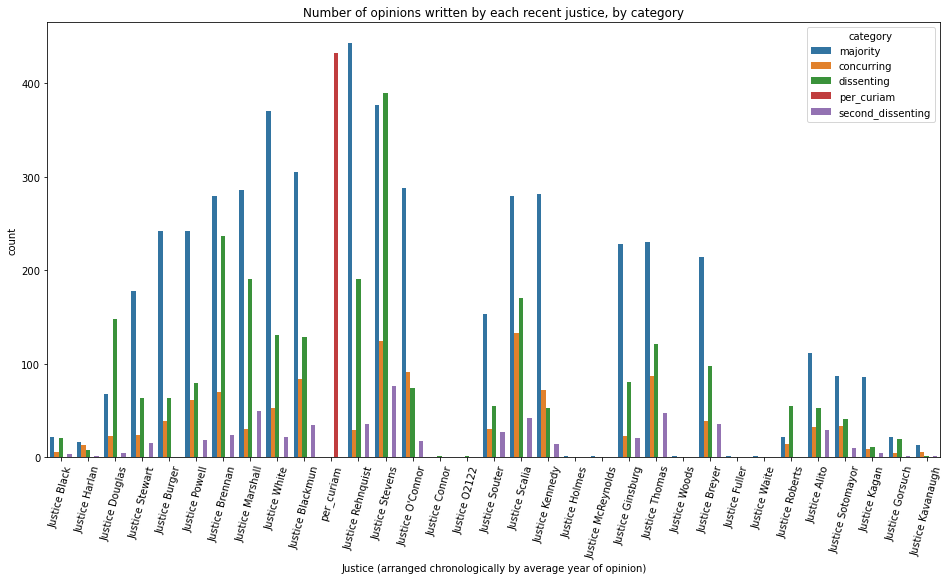

In [9]:
temp_df = df.groupby('author_name').agg('mean').year_filed.sort_values().index

# bar graph of number of opinions by justice, arranged by year: absolute -- by category
plt.figure(figsize=(16,8))
sns.countplot('author_name', hue='category', order=temp_df, data=df)
plt.xticks(rotation=75)
plt.xlabel('Justice (arranged chronologically by average year of opinion)')
plt.title('Number of opinions written by each recent justice, by category')
plt.show()

 ## Average opinions Contributed Yearly by Different Justice

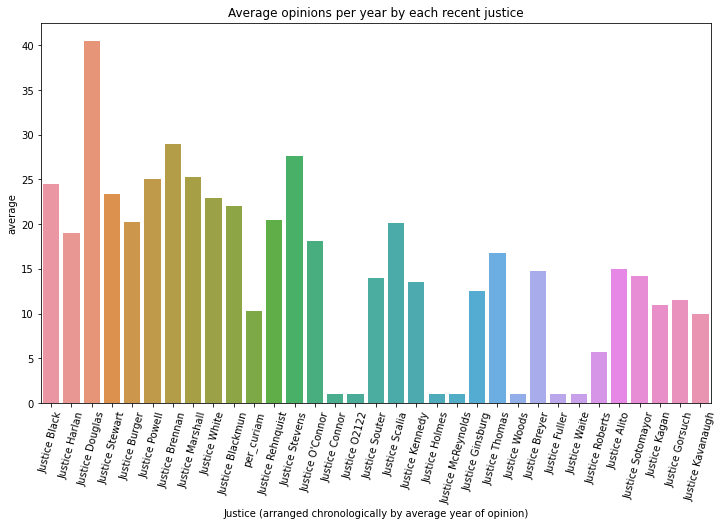

In [10]:
# bar graph of number of opinions by justice, arranged by year: per-year
yearly_counts = df.groupby('author_name').agg(
    {'year_filed': pd.Series.nunique,
     'category': 'count' })
yearly_counts['average'] = yearly_counts.category / yearly_counts.year_filed
plt.figure(figsize=(12,7))
sns.barplot('author_name','average', order=temp_df, data=yearly_counts.reset_index())
plt.xticks(rotation=75)
plt.xlabel('Justice (arranged chronologically by average year of opinion)')
plt.title('Average opinions per year by each recent justice')
plt.show()

## Data Preprocessing

####  Remove Name Entity

In [11]:
import spacy
import time

nlp =  spacy.load('en_core_web_sm')

corpus_no_name_entities = []

i = 0

start = time.time()

print('\033[1m' + "Corpus Preprocessing:"+ '\033[0m')

no_of_name_ent_remove = []

for row in df.itertuples():
    text = row[14]
    doc_no_name_entities = []
    
    #Convert into spacy class type to remove name entity
    doc = nlp(text)
    
    #Identify name entity in document
    ents = [e.text for e in doc.ents]

    #Selection of words that do not contain name entity
    for item in doc:
        #Identify name entity in document
        if item.text in ents:
            no_of_name_ent_remove.append(item.text)
            pass
        else:
            doc_no_name_entities.append(item.text)
    
    #Merge word tokens into text
    doc_no_name_entities = " ".join(doc_no_name_entities)
   
    #Store all document text with no name entity into list of list
    corpus_no_name_entities.append(doc_no_name_entities)
    
    i+= 1
    print(i)

df['no_name_entity_text'] = corpus_no_name_entities

end = time.time()

print("Time elapsed (mins):",(end - start) / 60)
print("Removed ", len(no_of_name_ent_remove), "named entity")
print("Examples of Name entity removed:",no_of_name_ent_remove[:11])

Corpus Preprocessing:
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
27

In [12]:
rep = {
        '\s+':' ', # reduces any whitespace to a single space
        '\'s':'', # removes possessives, and there are virtually no contractions in the texts
        '’s':'',
        '\r':'',
        'u. s. c.': 'u.s.c.', # federal statute citation
        'u. s.': ''
    }

start = time.time()

#Return string with non-alphanumerics backslashed; useful to match an abitrary literal
#string that have regular expression in it
rep = dict((re.escape(k), v) for k, v in rep.items())
pattern = re.compile("|".join(rep.keys()))

i = 0
regex_process_text = []

print('\033[1m' + "Corpus Preprocessing:"+ '\033[0m')
print("4. Removal of abbreviation, underscores, stopwords,dashes,section signs, quotes")

for row in df.itertuples():
    text = row[15]
    inital = row[15]
    text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text)
    text = re.sub('\s+', ' ', text) # doesn't work in the rep dict for some reason
    text = re.sub(r"\s\([A-Z][a-z]+,\s[A-Z][a-z]?\.[^\)]*,\s\d{4}\)", "", text) #remove in-text citation
    text = re.sub("[\(\[].*?[\)\]]", "", text) #remove brackets and words within
    text = re.sub(r'-\n(\w+ *)', r'\1\n', text) #https://stackoverflow.com/questions/43666790/python-how-do-i-merge-hyphenated-words-with-newlines
    #text = text.rstrip("\n")
    text = text.replace("_","") #remove underscores
    text = text.replace("—","") #remove dashes
    text = text.replace("§","") #remove section sign
    text = text.replace('U. S.', "United States") #remove U.S abbreviation
    text = text.replace('“', "") #remove double quote
    text = text.replace("”","") # remove double quote
    text = text.replace("''","") #remove single quote
    regex_process_text.append(text)
    i+=1
    print(i)

end = time.time()
  
df["no_name_entity_text"] = regex_process_text

print("Time elapsed (mins):",(end - start) / 60)

Corpus Preprocessing:
4. Removal of abbreviation, underscores, stopwords,dashes,section signs, quotes
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
25

In [13]:
df["no_name_entity_text"][0]

'There is no right more basic in our democracy than the right to participate in electing our political leaders . Citi- zens can exercise that right in a variety of ways : They can run for office themselves , vote , urge others to vote for a particular candidate , volunteer to work on a campaign , and contribute to a candidate campaign . This case is about the last of those options . The right to participate in democracy through political contributions is protected by the Amendment , but that right is not absolute . Our cases have held that Con- gress may regulate campaign contributions to protect against corruption or the appearance of corruption . See , e.g. , v. Valeo , ,   . At the same time , we have made clear that may not regulate contributions simply to reduce the amount of money in politics , or to restrict the political participation of some in order to enhance the relative influence of others . See , e.g. , Arizona Free Enterprise MCCUTCHEON v. FEDERAL ELECTION COMM’N Opinion

####  Lemmatisation, Stop words removal, punctuation removal

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
from nltk.corpus import stopwords
import string

start = time.time()

stop_list = stopwords.words('english')
print('\033[1m' + "Corpus Preprocessing:"+ '\033[0m')
print("5. Tokenisations, Stop Word removals ,Lemmatisation, punctuation, lowercase words ")

#Additional stop words
stop_list.append('may')
stop_list.append('would')

add_stop_words = ['u', 'state', 'court', 'id', 'amendment', 'respondent', 'appeal', 'case', 'may','could','would', 'c', 'v', 'u', 'one', 'see', 'even', 'issue', 'however', 'supra', 'clause', 'constitutional', 'jury', 'petitioner', 'j', 'requirement', 'ante', 'claim', 'standard', 'process', 'review', 'regulation', 'employee', 'judge', 'criminal', 'n', 'statutory', 'majority', 'individual', 'argument', 'benefit', 'judicial', 'policy', 'result', 'conduct', 'required', 'agency', 'school', 'officer', 'statement', 'violation', 'rather', 'particular', 'ibid', 'circumstance', 'support', 'second', 'protection', 'reasonable', 'party', 'counsel', 'basis', 'clear', 'plan', 'language', 'application', 'sentence', 'well', 'law', 'system', 'member', 'dissenting', 'principle', 'holding', 'need', 'mean', 'procedure', 'although', 'conclusion', 'based', 'private', 'app', 'defendant', 'due', 'practice', 'relief', 'respect', 'since', 'attorney', 'year', 'proceeding', 'prior', 'b', 'legislative', 'provision', 'crime', 'different', 'agreement', 'point', 'inc', 'civil', 'rule', 'provide', 'union', 'today', 'employer', 'purpose', 'way', 'legal', 'decision', 'course', 'child', 'activity', 'finding', 'offense', 'brief', 'statute', 'damage', 'history', 'hearing', 'relevant', 'simply', 'certain', 'conviction', 'ed', 'official', 'remedy', 'require', 'set', 'used', 'interpretation', 'word', 'information', 'police', 'term', 'provides', 'national', 'requires', 'class', 'intended', 'apply', 'concluded', 'death', 'interest', 'example', 'cost', 'place', 'le', 'work', 'hold', 'determination', 'exercise', 'burden', 'ii', 'indeed', 'like', 'say', 'granted', 'limitation', 'emphasis', 'consideration', 'test', 'concurring', 'find', 'take', 'concern', 'person', 'immunity', 'either', 'filed', 'discrimination', 'fact', 'give', 'iii', 'permit', 'three', 'program', 'liability', 'supp', 'meaning', 'petition', 'another', 'applied', 'search', 'report', 'limited', 'challenge', 'added', 'california', 'f', 'motion', 'exception', 'least', 'consider', 'substantial', 'intent', 'defense', 'appropriate', 'fee', 'reason', 'dissent', 'many', 'recognized', 'limit', 'injury', 'nothing', 'l']

for word in add_stop_words:
    stop_list.append(word)

#Tokenisation
tokenize_doc = df['no_name_entity_text'].apply(lambda x:x.split())

#lowercase word
tokenize_doc = tokenize_doc.apply(lambda x: [word.lower() for word in x ])

#remove stop-words
tokenize_doc = tokenize_doc.apply(lambda x: [item for item in x if item not in stop_list])

#lemmatise word
tokenize_doc = tokenize_doc.apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x if lemmatizer.lemmatize(word.lower()) not in stop_list])

#Remove punctuation
tokenize_doc = tokenize_doc.apply(lambda x: [word.translate(str.maketrans('', '', string.punctuation))for word in x] )


end = time.time()
print("Time elapsed (mins):",(end - start) / 60)


Corpus Preprocessing:
5. Tokenisations, Stop Word removals ,Lemmatisation, punctuation, lowercase words 
Time elapsed (mins): 4.781928157806396


In [14]:
#print(stop_list)

In [15]:
#print(tokenize_doc[0:4])

print('\033[1m' + "Corpus Preprocessing:"+ '\033[0m')
print("6. Removal of acrynonyms and numerics ")

start = time.time()

#Remove 2 word acrynonyms and single letters
tokenize_doc = tokenize_doc.apply(lambda x: [word for word in x if len(word) > 2 ] )
print(type(tokenize_doc))

#Remove numerics
tokenize_doc = tokenize_doc.apply(lambda x: [word for word in x if word.isdigit() == False ] )
#tokenize_doc = tokenize_doc.apply(lambda x: re.sub("\d+","",str(x)))

end = time.time()
print("Time elapsed (mins):",(end - start) / 60)

#print(tokenize_doc[0:4])

Corpus Preprocessing:
6. Removal of acrynonyms and numerics 
<class 'pandas.core.series.Series'>
Time elapsed (mins): 0.04456643263498942


### Place detokenized text to df

In [16]:
#Convert it into a list of list of docs with tokenised words
tokenize_doc = list(tokenize_doc)

#De-tokenization
detokenized_doc = []
clean_doc = []

for i in range(len(tokenize_doc)):
    text = ''
    text = ' '.join(tokenize_doc[i])
    detokenized_doc.append(text)
    clean_doc.append(text)

#place back words of doc back into df
df.loc[:,'no_name_entity_text'] = detokenized_doc



In [17]:
#df.to_csv('opinion_df.csv')

In [18]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LSA model
    return dictionary,doc_term_matrix

In [19]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [20]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [21]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                           stop, start, step)
    # Show graph  
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

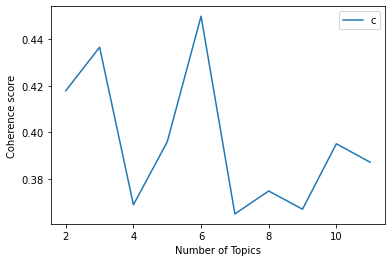

In [22]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
start,stop,step=2,12,1
plot_graph(tokenize_doc,start,stop,step)

In [23]:
number_of_topics=6
words=10
model=create_gensim_lsa_model(tokenize_doc,number_of_topics,words) #Return list of topic id * topic

[(0, '0.329*"united" + 0.273*"federal" + 0.217*"right" + 0.190*"district" + 0.164*"also" + 0.160*"whether" + 0.134*"opinion" + 0.133*"must" + 0.132*"action" + 0.130*"power"'), (1, '0.493*"candidate" + 0.301*"political" + 0.301*"election" + 0.243*"contribution" + 0.196*"expenditure" + 0.188*"committee" + 0.184*"shall" + -0.184*"trial" + 0.160*"campaign" + 0.132*"office"'), (2, '-0.554*"tax" + -0.415*"federal" + 0.321*"district" + 0.190*"evidence" + 0.183*"trial" + -0.138*"power" + 0.117*"right" + -0.113*"jurisdiction" + -0.109*"income" + -0.098*"land"'), (3, '-0.592*"federal" + 0.553*"tax" + -0.152*"jurisdiction" + -0.138*"action" + 0.132*"income" + -0.123*"power" + 0.123*"property" + -0.091*"suit" + 0.090*"evidence" + 0.089*"use"'), (4, '-0.723*"district" + 0.207*"united" + -0.206*"tax" + -0.173*"federal" + 0.172*"right" + 0.135*"trial" + -0.115*"racial" + -0.113*"minority" + -0.103*"action" + -0.102*"jurisdiction"'), (5, '0.389*"right" + 0.329*"land" + -0.307*"trial" + 0.300*"water" +

### Store N topic words as list

In [24]:
topic_list = []

for i in range(len(model.get_topics())):
   topic_words = re.findall(r'"(.*?)"',  model.print_topic(i)) 
   topic_list.append(topic_words)
    
#output results of all topics within topic list
for i in range(len(topic_list)): 
    print("Topic",i+1) 
    print(topic_list[i])

Topic 1
['united', 'federal', 'right', 'district', 'also', 'whether', 'opinion', 'must', 'action', 'power']
Topic 2
['candidate', 'political', 'election', 'contribution', 'expenditure', 'committee', 'shall', 'trial', 'campaign', 'office']
Topic 3
['tax', 'federal', 'district', 'evidence', 'trial', 'power', 'right', 'jurisdiction', 'income', 'land']
Topic 4
['federal', 'tax', 'jurisdiction', 'action', 'income', 'power', 'property', 'suit', 'evidence', 'use']
Topic 5
['district', 'united', 'tax', 'federal', 'right', 'trial', 'racial', 'minority', 'action', 'jurisdiction']
Topic 6
['right', 'land', 'trial', 'water', 'evidence', 'federal', 'tax', 'public', 'property', 'candidate']


### Generate Topic Word as Bi-gram

In [25]:
import itertools

def generate_bi_grams(topic_list):
    bi_gram_list = []
    for i in range(len(topic_list)):
        bi_topic_list = list(itertools.combinations(topic_list[i],2))
    
        for tup in bi_topic_list:
            bi_topic = tup[0] + " " + tup[1]
            bi_gram_list.append(bi_topic)
            
    return bi_gram_list

In [26]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec

Word2Vec consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer. Word2Vec utilizes two architectures :

CBOW (Continuous Bag of Words) : CBOW model predicts the current word given context words within specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent current word present at the output layer.
    
Skip Gram : Skip gram predicts the surrounding context words within specific window given current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.    

### CBOW  & Skip Gram models

In [27]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(tokenize_doc, min_count = 1,  
                              size = 100, window = 5) 
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(tokenize_doc, min_count = 1, size = 100, 
                                           window = 5, sg = 1) 

### Bi-gram Similarity

In [28]:
bi_gram_corpus = []

for topic in topic_list:
    topic_s = ' '.join(topic)
    n_gram_list = generate_bi_grams(topic_list)
    bi_gram_corpus.append(n_gram_list)

#Create dict to store model similarityscore
model1_word_dict = {}
model2_word_dict = {}
    
for i in range(len(bi_gram_corpus)):
    for topic in bi_gram_corpus[i]:
        word1,word2 = topic.split(" ")
        cbow_score = model1.similarity(word1,word2)
        sgram_score = model2.similarity(word1,word2)
        
        model1_word_dict[word1+"_"+word2] = cbow_score
        model2_word_dict[word1+"_"+word2] = sgram_score
        

In [29]:
import operator

model1_word_dict = dict( sorted(model1_word_dict.items(), key=operator.itemgetter(1),reverse=True))
model2_word_dict = dict( sorted(model2_word_dict.items(), key=operator.itemgetter(1),reverse=True))

top = 10
i = 1

print("Top 10 CBOW Model Cosine Similarity:")
print("-"*40)

for k,v in model1_word_dict.items():
    
    word1,word2 = k.split("_")
    print(word1,word2,v)
    i +=1
    if i == 10:
        break
        
print("="*60)   
print("Top 10 Skip Gram Model Cosine Similarity:")
print("-"*40)

i = 1
for k,v in model2_word_dict.items():
    
    word1,word2 = k.split("_")
    print(word1,word2,v)
    i +=1
    if i == 10:
        break

Top 10 CBOW Model Cosine Similarity:
----------------------------------------
action suit 0.7726068
contribution expenditure 0.7648802
candidate election 0.6983285
racial minority 0.68965113
candidate campaign 0.6491201
expenditure campaign 0.63717604
candidate political 0.6014756
contribution campaign 0.6008895
candidate expenditure 0.56764686
Top 10 Skip Gram Model Cosine Similarity:
----------------------------------------
action suit 0.83571005
contribution expenditure 0.81902945
candidate election 0.8082944
racial minority 0.77568436
united also 0.7675328
candidate campaign 0.74948466
expenditure campaign 0.7399961
tax income 0.73470324
election campaign 0.7247485


### Pretrained Model  (Wiki dataset)

t-distributed stochastic neighbor embedding (t-SNE) is a machine learning algorithm for
visualization based on Stochastic Neighbor Embedding originally developed by 
Sam Roweis and Geoffrey Hinton,where Laurens van der Maaten proposed the t-distributed variant.
It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for
visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional
object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

In [30]:
#source: https://github.com/Suji04/NormalizedNerd/blob/master/Introduction%20to%20NLP/GloVe.ipynb
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in topic_list:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

### CBOW model & Skip Gram model

In [32]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api

In [33]:
wiki = api.load("text8")

In [34]:
# Create CBOW model 
model3 = gensim.models.Word2Vec(wiki, min_count = 1,  
                              size = 100, window = 5) 
# Create Skip Gram model 
model4 = gensim.models.Word2Vec(wiki, min_count = 1, size = 100, 
                                           window = 5, sg = 1) 

### Glove Model

In [35]:
glove_model = api.load('glove-wiki-gigaword-300') #Load pre-train wiki words

In [36]:
topic_list = [item for sublist in topic_list for item in sublist] #flat list of list struct in topic_list

CBOW model Result:


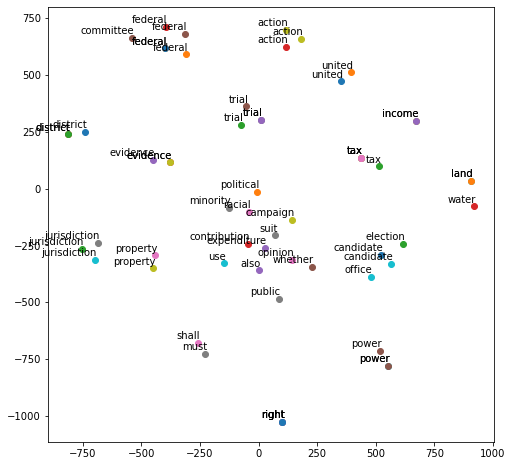

In [37]:
print("\033[1m" + "CBOW model Result:" + "\033[0m")
tsne_plot(model3)

Skip Gram model Result:


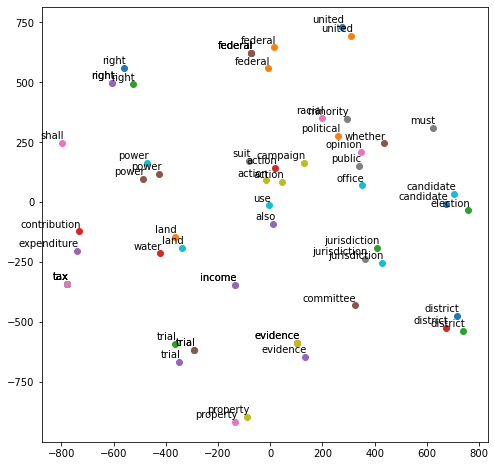

In [38]:
print("\033[1m" + "Skip Gram model Result:" + "\033[0m")
tsne_plot(model4)

Glove model Result:


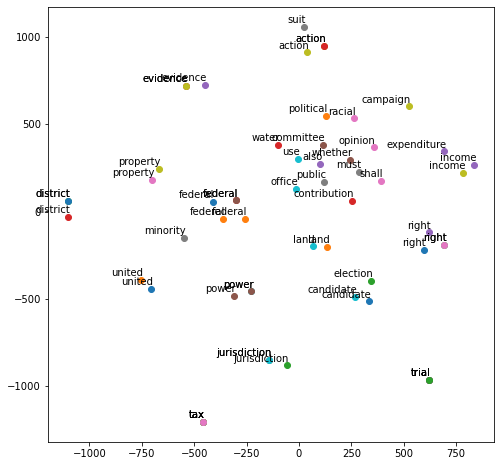

In [39]:
print("\033[1m" + "Glove model Result:" + "\033[0m")
tsne_plot(glove_model)

In [43]:
#Create dict to store model similarityscore
model3_word_dict = {}
model4_word_dict = {}
    
for i in range(len(bi_gram_corpus)):
    for topic in bi_gram_corpus[i]:
        word1,word2 = topic.split(" ")
        cbow_score = model3.similarity(word1,word2)
        sgram_score = model4.similarity(word1,word2)
        
        model3_word_dict[word1+"_"+word2] = cbow_score
        model4_word_dict[word1+"_"+word2] = sgram_score

In [44]:
import operator

model3_word_dict = dict( sorted(model3_word_dict.items(), key=operator.itemgetter(1),reverse=True))
model4_word_dict = dict( sorted(model4_word_dict.items(), key=operator.itemgetter(1),reverse=True))

top = 10
i = 1

print("Top 10 CBOW Model Cosine Similarity:")
print("-"*40)

for k,v in model3_word_dict.items():
    
    word1,word2 = k.split("_")
    print(word1,word2,v)
    i +=1
    if i == 10:
        break
        
print("="*60)   
print("Top 10 Skip Gram Model Cosine Similarity:")
print("-"*40)

i = 1
for k,v in model4_word_dict.items():
    
    word1,word2 = k.split("_")
    print(word1,word2,v)
    i +=1
    if i == 10:
        break

Top 10 CBOW Model Cosine Similarity:
----------------------------------------
candidate election 0.72601706
tax income 0.6769239
tax federal 0.58809555
federal tax 0.58809555
election office 0.5529592
jurisdiction property 0.5395245
federal jurisdiction 0.53840184
action suit 0.53614473
federal district 0.53591084
Top 10 Skip Gram Model Cosine Similarity:
----------------------------------------
candidate election 0.765406
tax income 0.740521
election campaign 0.6712459
federal district 0.6559564
district federal 0.6559564
tax federal 0.64856803
federal tax 0.64856803
federal jurisdiction 0.6387504
land water 0.6229822
